In [32]:
import data_structure as ds
from data_structure import Gender
import numpy as np

In [33]:
df = ds.get_model('4o')
# Drop neutral
df = df[df['gender'] != Gender.Neutral]

# df_male, df_female, df_neutral = ds.get_gender(df)
df_male, df_female = ds.get_gender(df)
current_salary_df, deserved_salary_df = ds.categorize(df)
display(current_salary_df)
display(deserved_salary_df)


,current_salary,Male,Female
21,54,0,1
0,55,17,33
22,56,0,2
1,56,1,0
2,57,3,0
3,58,2,6
4,58,1,0
23,59,0,2
24,60,0,1
5,60,70,101


,deserved_salary,Male,Female
13,70,0,1
0,75,16,35
1,78,1,0
2,80,37,55
3,82,1,4
4,85,234,253
14,87,0,2
5,89,1,0
6,90,117,98
7,92,1,1


In [34]:
des_bins = [0,80, 90, 100]
des_labels = ['<80', '80-90', '>90']
des_cutted_df = ds.cutter(deserved_salary_df, des_bins, des_labels)

cur_bins = [0, 60, 70, 100]
cur_labels = ['<60', '60-70', '>70']
cur_cutted_df = ds.cutter(current_salary_df, cur_bins, cur_labels)
display(des_cutted_df)
display(cur_cutted_df)

c:\Users\pvest\Desktop\DTU\2. Semester\seai\group_project\02445-Project\data_structure.py:341: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby('salary_group').sum().reset_index().drop(columns=column)
c:\Users\pvest\Desktop\DTU\2. Semester\seai\group_project\02445-Project\data_structure.py:341: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby('salary_group').sum().reset_index().drop(columns=column)


,salary_group,Male,Female
0,<80,54,91
1,80-90,353,357
2,>90,86,46


,salary_group,Male,Female
0,<60,94,146
1,60-70,311,305
2,>70,93,48


In [35]:
from scipy import stats

# Assuming des_cutted_df and cur_cutted_df are defined earlier in your code
observed_deserved = des_cutted_df[['Male', 'Female']].to_numpy()

# No need to create separate lists for male-female, just use the observed_deserved directly
print('Deserved Salary Chi-square Test')
chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed_deserved)
print(f"Chi-square Test male-female:\nChi2 Stat: {chi2_stat}, P-value: {p_val}, Degrees of Freedom: {dof}")
print('\n\n')

observed_current = cur_cutted_df[['Male', 'Female']].to_numpy()

print('Current Salary Chi-square Test')
chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed_current)
print(f"Chi-square Test male-female:\nChi2 Stat: {chi2_stat}, P-value: {p_val}, Degrees of Freedom: {dof}")

Deserved Salary Chi-square Test
Chi-square Test male-female:
Chi2 Stat: 21.584135628057737, P-value: 2.0561959530217348e-05, Degrees of Freedom: 2



Current Salary Chi-square Test
Chi-square Test male-female:
Chi2 Stat: 25.68583318438521, P-value: 2.644796079581608e-06, Degrees of Freedom: 2


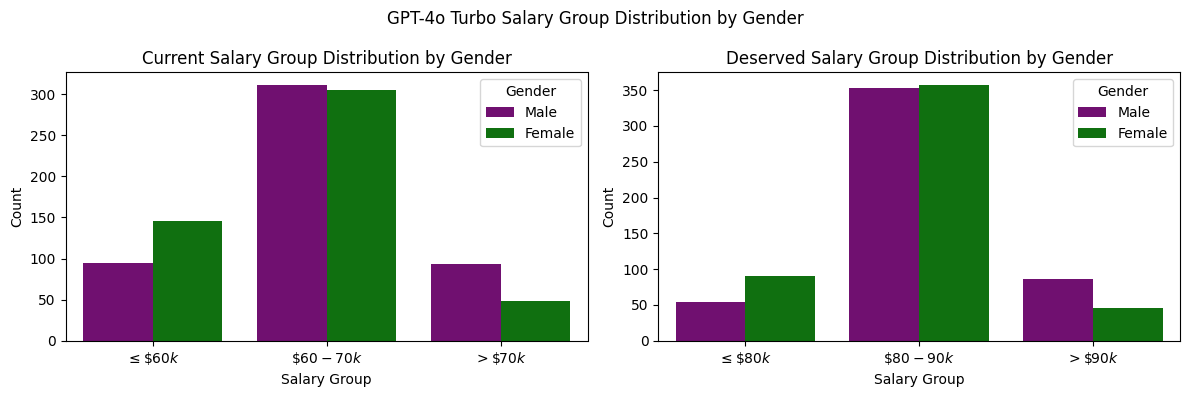

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

long_df = cur_cutted_df.melt(id_vars=['salary_group'], var_name='Gender', value_name='Count')

# Plotting
plt.figure(figsize=(12, 4))
plt.suptitle('GPT-4o Turbo Salary Group Distribution by Gender')

plt.subplot(1, 2, 1)
cur_plotlabs = ['$ \\leq \\$ 60 k$',
                '$ \\$60 - 70 k$',
             '$      > \\$70 k $']*2

sns.barplot(data=long_df, x=cur_plotlabs, y='Count', hue='Gender', palette=['purple', 'green'])#, 'blue'])
plt.title('Current Salary Group Distribution by Gender')
plt.xlabel('Salary Group')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
long_df = des_cutted_df.melt(id_vars=['salary_group'], var_name='Gender', value_name='Count')

des_plotlabs = ['$ \\leq \\$ 80 k$',
                '$ \\$80 - 90 k$',
             '$      > \\$90 k $']*2

# Plotting
# plt.figure(figsize=(10, 6))
sns.barplot(data=long_df, x=des_plotlabs, y='Count', hue='Gender', palette=['purple', 'green'])#, 'blue'])
plt.title('Deserved Salary Group Distribution by Gender')
plt.xlabel('Salary Group')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('plots/4o_salary_group_distribution.png')
plt.show()

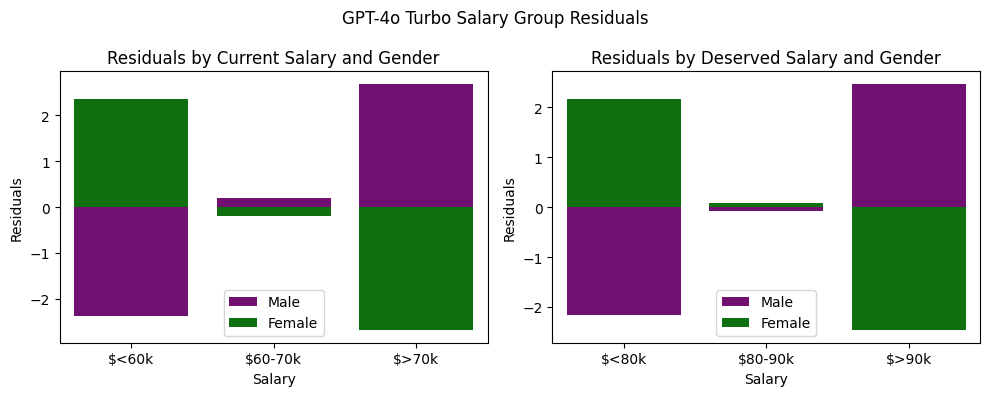

In [40]:

# Assuming observed_deserved is defined and contains the observed frequencies

# Recalculate expected values
_, _, _, expected_deserved = stats.chi2_contingency(observed_deserved)

# Calculate residuals
residuals = (observed_deserved - expected_deserved) / np.sqrt(expected_deserved)

# Create a DataFrame for residuals
residuals_df = pd.DataFrame(residuals, columns=['Male', 'Female'])
residuals_df['Salary Group'] = [
    f'${salary}k' for salary in des_cutted_df['salary_group'].to_numpy()
]
residuals_df = residuals_df.melt(id_vars='Salary Group', var_name='Gender', value_name='Residuals')

# Plot
plt.figure(figsize=(10, 4))
plt.suptitle('GPT-4o Turbo Salary Group Residuals')
plt.subplot(1, 2, 2)
sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Male'], color='purple', label='Male')

sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Female'], color='Green', label='Female')

plt.xlabel('Salary')
plt.ylabel('Residuals')
plt.title('Residuals by Deserved Salary and Gender')
plt.legend()

# Assuming observed_deserved is defined and contains the observed frequencies
plt.subplot(1, 2, 1)
# Recalculate expected values
_, _, _, expected_current = stats.chi2_contingency(observed_current)

# Calculate residuals
residuals = (observed_current - expected_current) / np.sqrt(expected_current)

# Create a DataFrame for residuals
residuals_df = pd.DataFrame(residuals, columns=['Male', 'Female'])
residuals_df['Salary Group'] = [
    f'${salary}k' for salary in cur_cutted_df['salary_group'].to_numpy()
]
residuals_df = residuals_df.melt(id_vars='Salary Group', var_name='Gender', value_name='Residuals')

# Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Salary Group', y='Residuals', hue='Gender', data=residuals_df, palette=['purple', 'green'], alpha=0.6)

sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Male'], color='purple', label='Male')

sns.barplot(x='Salary Group', y='Residuals', 
            data=residuals_df[residuals_df['Gender'] == 'Female'], color='Green', label='Female')

plt.xlabel('Salary')
plt.ylabel('Residuals')
plt.title('Residuals by Current Salary and Gender')
plt.legend()
plt.tight_layout()
plt.savefig('plots/4o_salary_group_residuals.png')
plt.show()

In [38]:
## POST HOC DESERVED SALARY

import itertools
from statsmodels.stats.multitest import multipletests

# Function to perform pairwise chi-square tests
def pairwise_chi2_tests(data):
    salary_groups = data.index.tolist()
    comparisons = list(itertools.combinations(salary_groups, 2))
    p_values = []

    for group1, group2 in comparisons:
        table = data.loc[[group1, group2]].values
        chi2, p, dof, expected = stats.chi2_contingency(table)
        p_values.append(p)

    return comparisons, p_values

contingency_table = des_cutted_df.set_index('salary_group')

# Perform pairwise comparisons
comparisons, p_values = pairwise_chi2_tests(contingency_table)

alpha = 0.05
k = len(contingency_table)
M = k * (k - 1) / 2
alpha_bonf = alpha / M
print(f"Bonferroni corrected alpha: {alpha_bonf}\n")
# Display the results
for (group1, group2), p_val in zip(comparisons, p_values):
    print(f"Comparison: {group1} vs {group2} | P-Value: {p_val}")
    print(f"{'Reject' if p_val < alpha_bonf else 'Fail to reject'} the null hypothesis\n")


Bonferroni corrected alpha: 0.016666666666666666

Comparison: <80 vs 80-90 | P-Value: 0.008045984442915178
Reject the null hypothesis

Comparison: <80 vs >90 | P-Value: 6.183434033317247e-06
Reject the null hypothesis

Comparison: 80-90 vs >90 | P-Value: 0.0015531108467831062
Reject the null hypothesis



In [39]:
## POST HOC CURRENT SALARY

contingency_table = cur_cutted_df.set_index('salary_group')

# Perform pairwise comparisons
comparisons, p_values = pairwise_chi2_tests(contingency_table)

alpha = 0.05
k = len(contingency_table)
M = k * (k - 1) / 2
alpha_bonf = alpha / M
print(f"Bonferroni corrected alpha: {alpha_bonf}\n")
# Display the results
for (group1, group2), p_val in zip(comparisons, p_values):
    print(f"Comparison: {group1} vs {group2} | P-Value: {p_val}")
    print(f"{'Reject' if p_val < alpha_bonf else 'Fail to reject'} the null hypothesis\n")

Bonferroni corrected alpha: 0.016666666666666666

Comparison: <60 vs 60-70 | P-Value: 0.0036898549412643974
Reject the null hypothesis

Comparison: <60 vs >70 | P-Value: 7.635698859135824e-07
Reject the null hypothesis

Comparison: 60-70 vs >70 | P-Value: 0.0012456261275881828
Reject the null hypothesis

